In [1]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=5, n_samples=1000, random_state=44)

X[:5]

array([[-1.48338259, -2.1821318 ],
       [-2.75751986, -1.87670476],
       [-1.38275861, -2.66244686],
       [-2.09763597,  0.67187234],
       [-1.05470489, -1.03278115]])

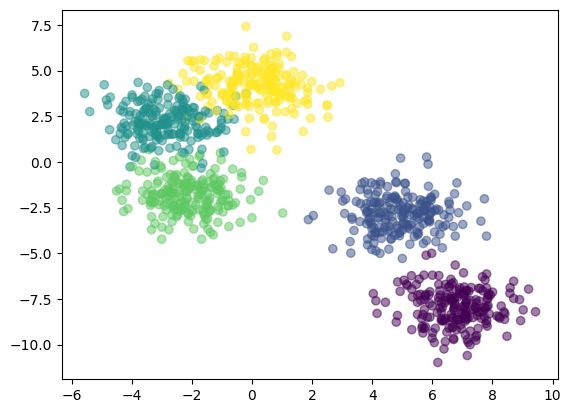

In [2]:
from matplotlib import pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.show()

In [3]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

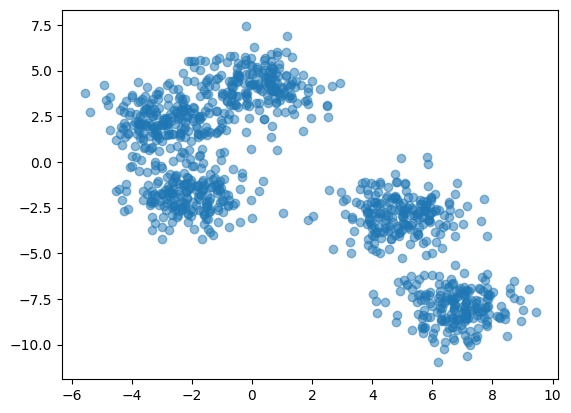

In [4]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

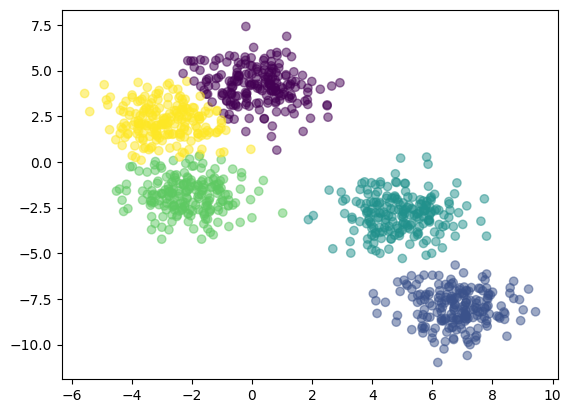

In [5]:
plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=0.5)
plt.show()

In [6]:
kmeans.labels_

array([3, 3, 3, 4, 3, 3, 0, 0, 2, 1, 2, 2, 3, 0, 2, 0, 2, 1, 3, 0, 4, 4,
       1, 0, 3, 3, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 4, 0, 2, 0, 2, 2, 4, 2,
       0, 2, 1, 2, 1, 1, 1, 0, 4, 2, 2, 1, 3, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 3, 0, 1, 0, 2, 1, 0, 3, 3, 2, 3, 0, 0, 4, 0, 0, 0, 1, 4, 3, 3,
       3, 2, 4, 0, 4, 0, 3, 1, 0, 1, 1, 0, 4, 3, 2, 1, 2, 4, 4, 0, 4, 3,
       3, 0, 4, 0, 0, 2, 3, 3, 3, 4, 2, 2, 3, 4, 3, 4, 0, 4, 4, 0, 3, 1,
       3, 3, 2, 0, 4, 4, 3, 3, 3, 2, 1, 1, 1, 1, 4, 3, 3, 0, 2, 4, 4, 2,
       3, 1, 1, 0, 0, 2, 4, 1, 3, 1, 2, 4, 4, 4, 2, 2, 2, 1, 1, 2, 3, 2,
       1, 1, 1, 3, 1, 1, 4, 2, 3, 4, 4, 1, 4, 1, 1, 0, 1, 2, 4, 4, 4, 4,
       2, 2, 2, 3, 1, 1, 4, 1, 0, 1, 0, 0, 2, 0, 4, 2, 4, 0, 0, 1, 1, 2,
       2, 2, 0, 3, 1, 0, 1, 1, 3, 3, 3, 4, 1, 2, 2, 2, 0, 1, 3, 4, 1, 2,
       0, 2, 1, 3, 2, 3, 2, 2, 3, 4, 4, 4, 4, 4, 1, 2, 1, 1, 2, 4, 3, 2,
       0, 4, 3, 3, 2, 0, 1, 4, 0, 4, 0, 4, 1, 3, 4, 3, 4, 3, 2, 2, 3, 4,
       1, 0, 1, 2, 4, 4, 2, 1, 3, 0, 3, 2, 3, 0, 1,

In [7]:
kmeans.cluster_centers_

array([[ 0.17527701,  4.1930808 ],
       [ 6.80067385, -7.97390067],
       [ 4.92323403, -2.87637315],
       [-2.1298163 , -1.83694043],
       [-2.88168881,  2.20541066]])

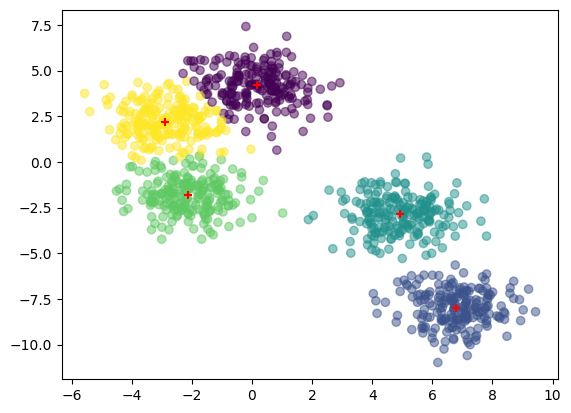

In [8]:
plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="+",c="r")
plt.show()

In [9]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

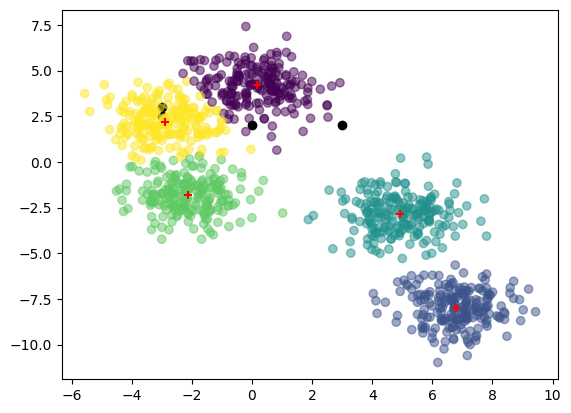

In [10]:
plt.scatter(X_new[:,0], X_new[:,1], c="k")
plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="+",c="r")
plt.show()

In [11]:
kmeans.predict(X_new)

array([0, 0, 4, 4], dtype=int32)

In [12]:
def show_contour_plot(X, y, clf):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()

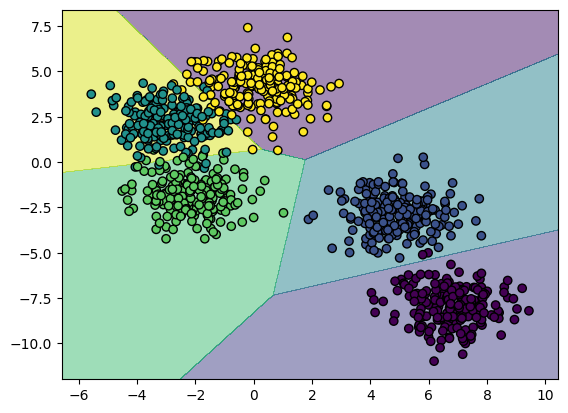

In [13]:
show_contour_plot(X, y, kmeans)

In [14]:
kmeans.transform(X_new).round(2)

array([[ 2.2 , 12.07,  6.93,  4.39,  2.89],
       [ 3.58, 10.67,  5.24,  6.41,  5.89],
       [ 3.39, 14.71,  9.86,  4.91,  0.8 ],
       [ 3.6 , 14.34,  9.58,  4.42,  0.32]])

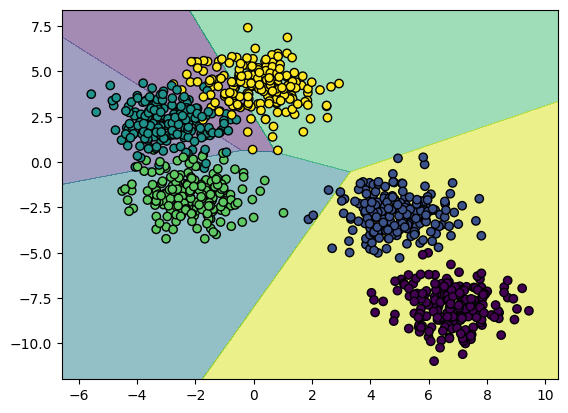

4742.039699169133

In [15]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

show_contour_plot(X,y,kmeans)
kmeans.inertia_

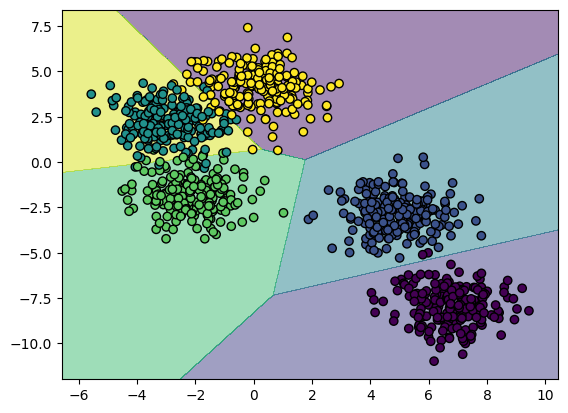

1956.0203949987251

In [16]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=42)
kmeans.fit(X)

show_contour_plot(X, y, kmeans)
kmeans.inertia_

In [17]:
kmeans.score(X)

-1956.0203949987251

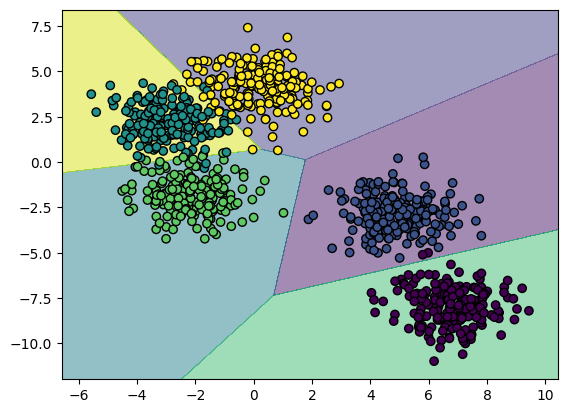

In [18]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

show_contour_plot(X, y, minibatch_kmeans)

In [19]:
inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

inertia

[9672.419167326834,
 6156.367554608991,
 3211.854111315017,
 1956.0203949987251,
 1816.1852288504735,
 1679.0480529475785,
 1535.3302886192457,
 1398.0989733791307]

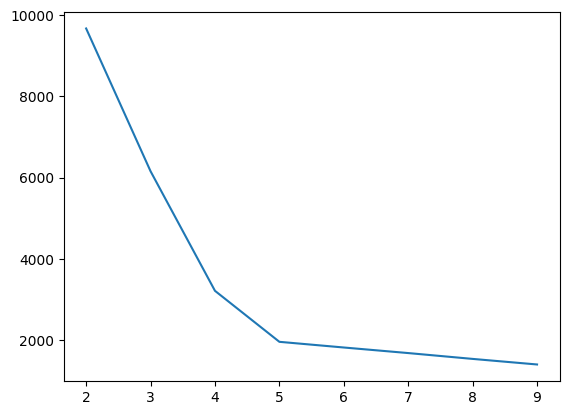

In [20]:
plt.plot(range(2,10), inertia)
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.3499945595480932

In [22]:
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

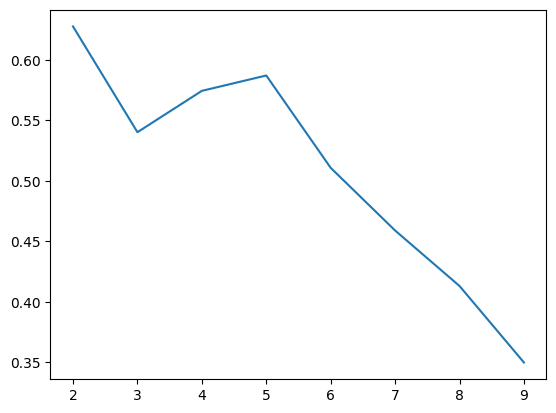

In [23]:
plt.plot(range(2,10), silhouette_scores)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6274149872060885
For n_clusters = 3 The average silhouette_score is : 0.581625838066083
For n_clusters = 4 The average silhouette_score is : 0.5758663458358105
For n_clusters = 5 The average silhouette_score is : 0.5869435845394256
For n_clusters = 6 The average silhouette_score is : 0.5276828841115534


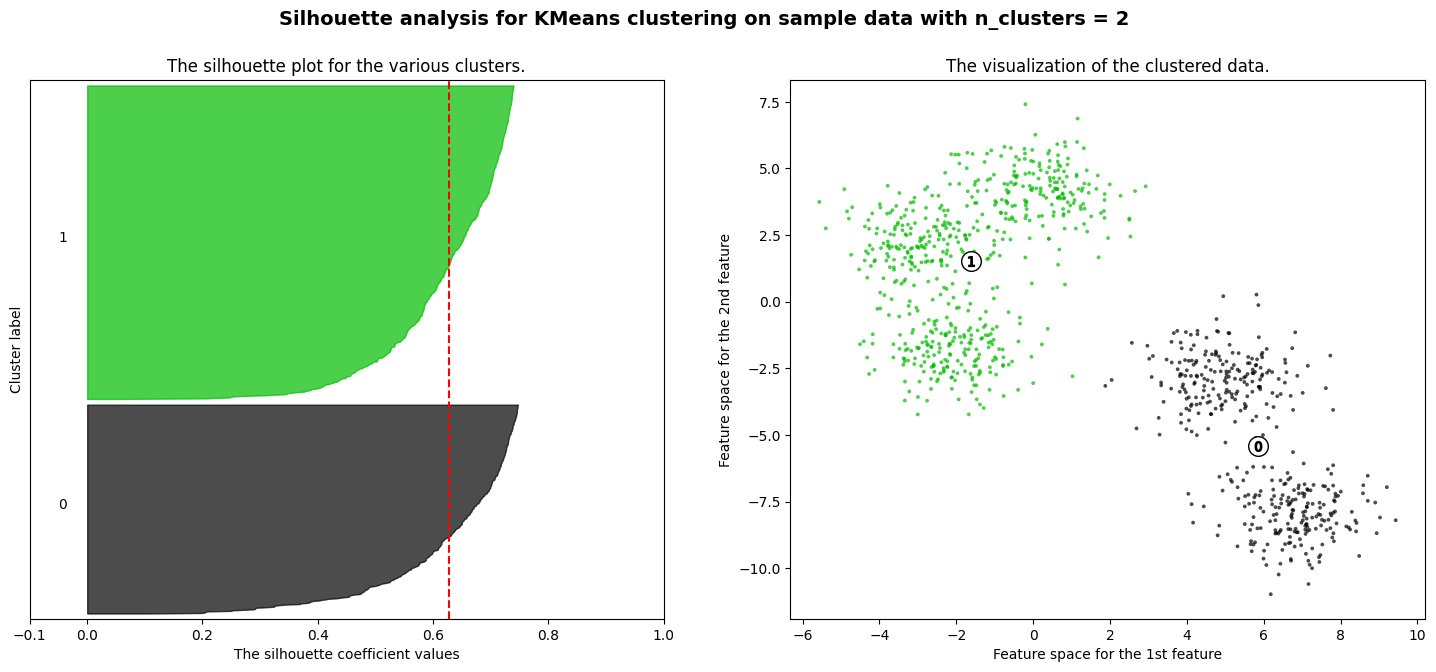

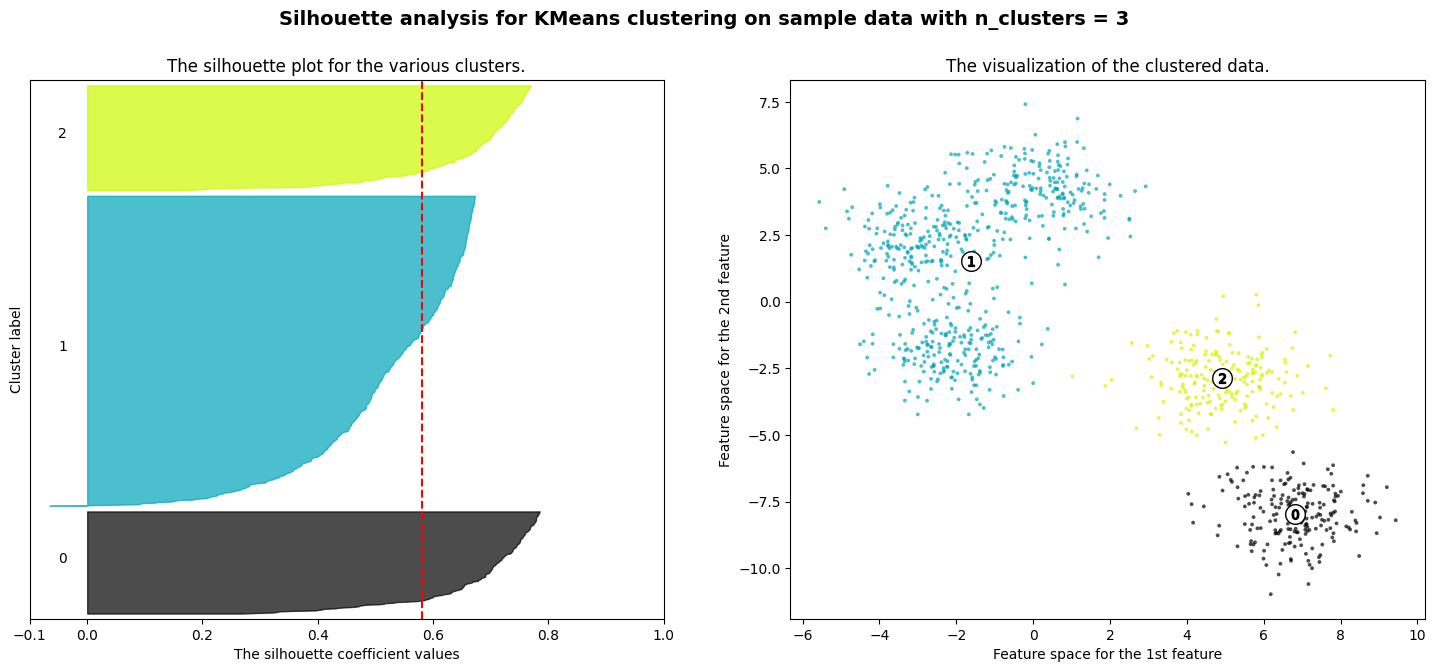

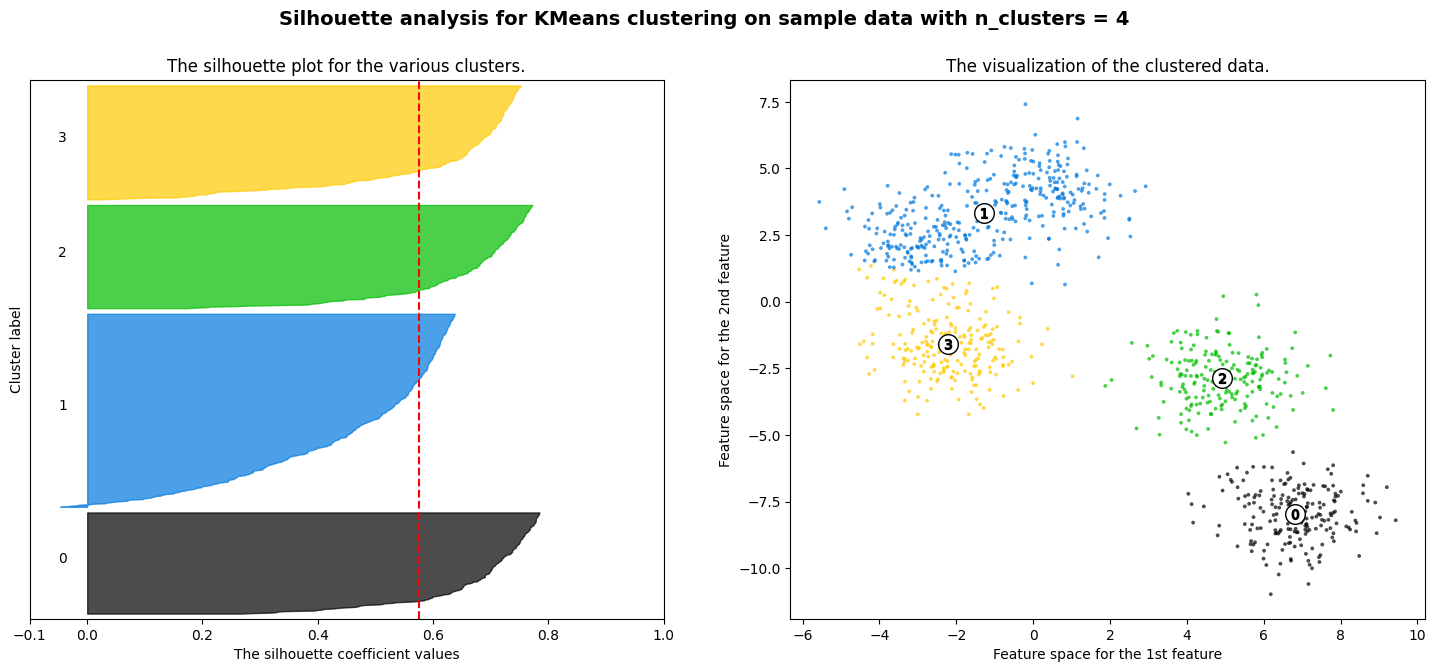

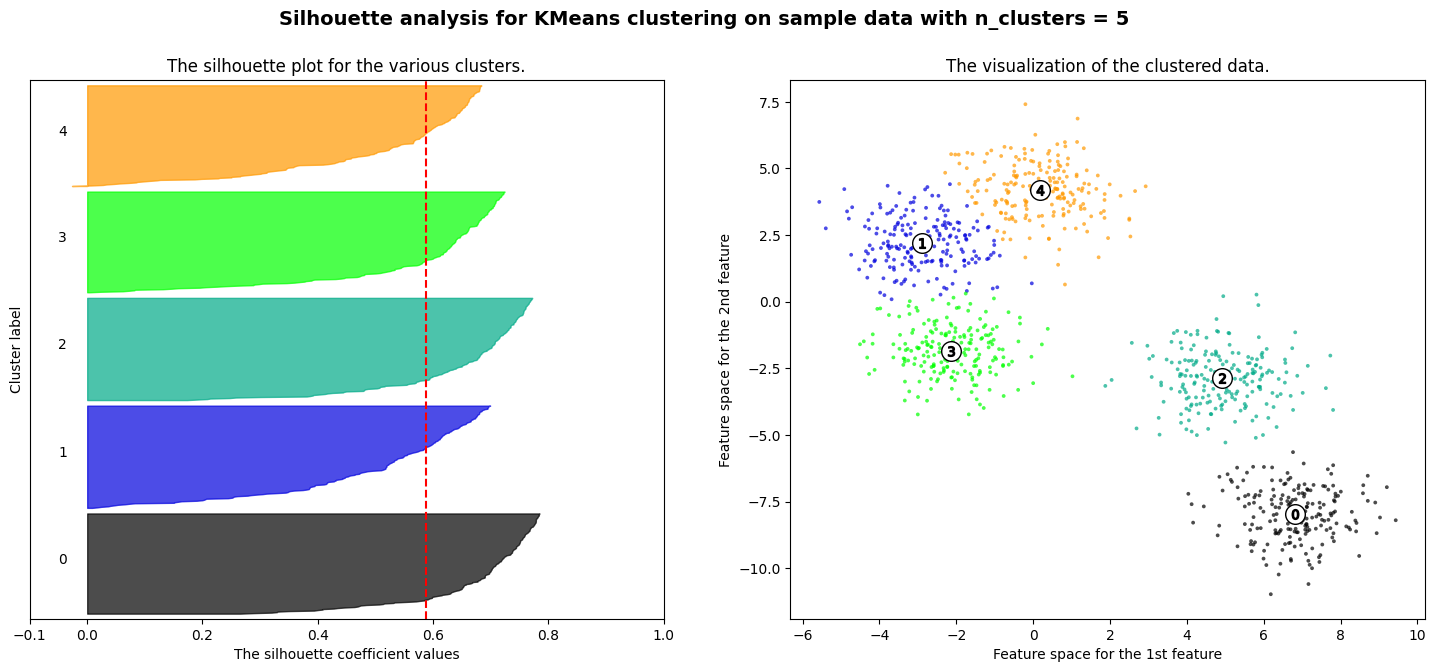

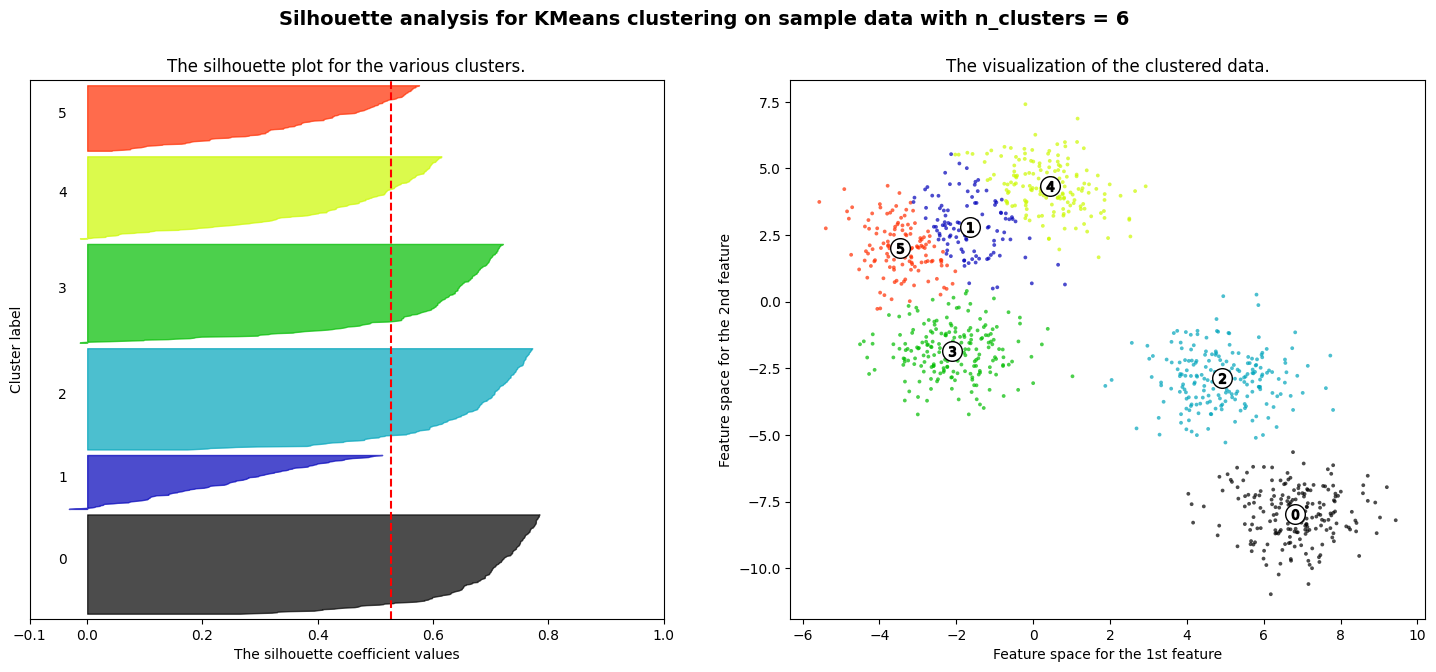

In [24]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [25]:
import PIL
filepath = "ladybug.jpg"
image = np.asarray(PIL.Image.open(filepath))
image_shape = image.shape
image_shape

(407, 612, 3)

In [26]:
image[:1]

array([[[132, 163,   0],
        [132, 163,   0],
        [132, 163,   0],
        ...,
        [140, 179,  24],
        [141, 180,  27],
        [143, 182,  29]]], dtype=uint8)

In [27]:
X = image.reshape(-1, 3)
X[:5]

array([[132, 163,   0],
       [132, 163,   0],
       [132, 163,   0],
       [132, 163,   0],
       [131, 162,   0]], dtype=uint8)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [29]:
kmeans.cluster_centers_

array([[142.82104577, 172.56835804,  32.4795325 ],
       [213.75070898, 218.32869638, 211.60225678],
       [ 88.65554658, 112.67416626,   6.04107537]])

In [30]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [31]:
segmented_image = segmented_image.reshape(image_shape)

In [32]:
segmented_image.shape

(407, 612, 3)

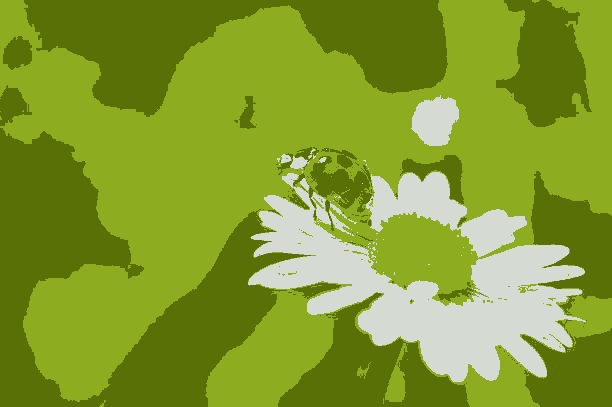

In [33]:
from PIL import Image

Image.fromarray(segmented_image.astype(np.uint8)).show()

In [34]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

len(X_train), len(X_test)

(1400, 397)

In [35]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [36]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [37]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
y_represenative_digits = y_train[representative_digit_idx]

In [38]:
log_reg.fit(X_representative_digits, y_represenative_digits)

LogisticRegression(max_iter=10000)

In [39]:
log_reg.score(X_test, y_test)

0.8337531486146096

In [40]:
kmeans.labels_

array([31,  2, 38, ...,  7,  7,  5], dtype=int32)

In [41]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_represenative_digits[i]

In [42]:
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [43]:
log_reg.score(X_test, y_test)

0.8690176322418136

In [44]:
percentile_closest = 98

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
X_cluster_dist[:1]

array([10.66212143])

In [45]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff =  (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [46]:
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=10000)

In [47]:
log_reg.score(X_test, y_test)

0.8639798488664987

In [50]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.961395694135115

In [52]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [53]:
from sklearn.semi_supervised import SelfTrainingClassifier

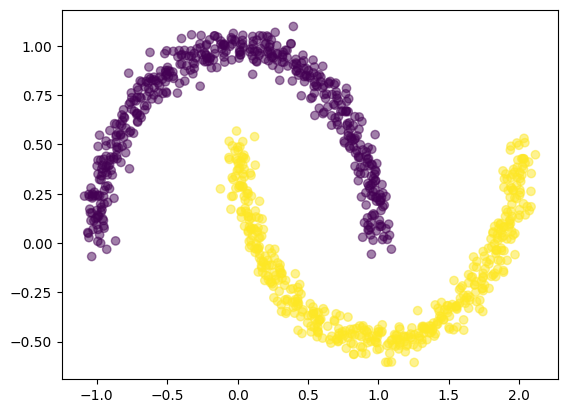

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)

In [60]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [61]:
dbscan.labels_

array([ 0,  1,  2,  2,  3,  4,  2,  1,  2,  4,  3,  1,  0,  4,  4,  0,  5,
        2,  2,  2,  1,  8,  5,  5,  3,  5,  4,  1,  4,  6,  0,  7,  1,  4,
        1,  4,  6,  2,  2,  2, -1,  5, -1,  2,  5,  5,  2,  1,  3,  7,  4,
        1,  5, -1,  5,  5,  1,  2,  7, -1,  0,  1,  1,  7, -1,  7,  1,  1,
        2,  5,  1,  5,  5, -1,  2,  5,  7,  5,  5,  6,  5,  2,  1,  2,  5,
        3,  1,  1,  1,  0,  1,  1, -1,  2,  4,  5,  5,  5,  3,  1,  4,  4,
        2,  1,  2,  0,  1,  2,  4,  7,  4, -1,  6,  2,  2,  4,  1,  2, -1,
        3,  5,  4,  1,  4,  5,  0,  2,  2,  5,  1,  2,  2,  4,  4,  5,  5,
        7,  7,  1,  5, -1,  0,  5,  2,  5,  7,  1,  2,  0,  5,  1,  3,  5,
        3,  2,  1,  4,  5,  5, -1,  1,  2,  1,  3,  4,  1,  5,  4,  3,  5,
       -1,  5,  4,  0,  2,  1,  4,  1, -1,  0,  1,  5, -1,  2,  1, -1,  5,
        4, -1,  5,  2, -1,  2,  4,  0,  2,  5,  4,  5,  0,  2,  2,  1,  3,
        5,  7,  5,  0,  2,  4,  2,  0,  5,  5,  4,  7,  0,  4,  5,  5,  2,
        2,  7,  2, -1,  3

In [62]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        41,  44,  46,  47,  48,  49,  50,  51,  52,  54,  55,  57,  60,
        61,  62,  63,  65,  67,  68,  69,  70,  71,  72,  74,  76,  78,
        79,  80,  81,  83,  85,  87,  89,  90,  91,  93,  95,  96,  98,
        99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 131, 132, 133, 134, 135, 136, 137, 138, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 154, 155, 156, 158, 160, 161, 162,
       163, 164, 165, 166, 167, 169, 171, 172, 173, 174, 175, 177, 179,
       180, 181, 184, 186, 187, 192, 193, 194, 195, 198, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216,
       219, 221, 222, 223, 225, 227, 228, 229, 230, 231, 232, 23

In [63]:
dbscan.components_

array([[ 1.02203819,  0.22994377],
       [-0.61864219,  0.83339088],
       [ 1.94053883,  0.33185291],
       ...,
       [ 1.0180627 ,  0.16500679],
       [ 1.0614123 , -0.51947237],
       [ 0.25390978, -0.2195775 ]])

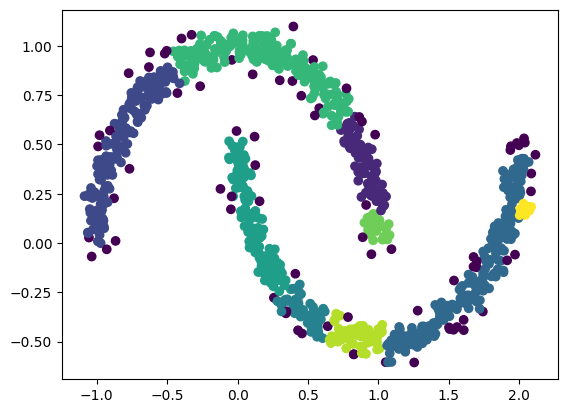

In [64]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

In [65]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

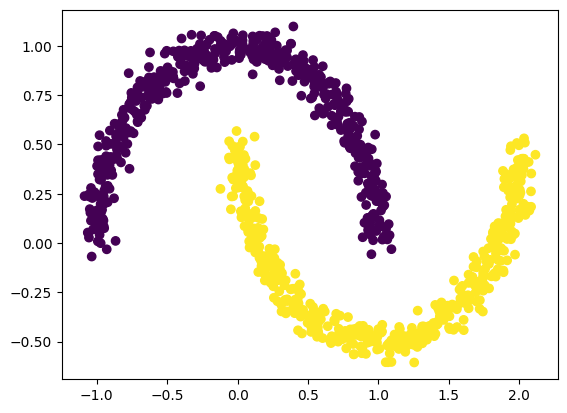

In [66]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [69]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [70]:
knn.predict(X_new)

array([0, 1, 0, 1])

In [71]:
knn.predict_proba(X_new)

array([[0.86, 0.14],
       [0.  , 1.  ],
       [0.82, 0.18],
       [0.  , 1.  ]])

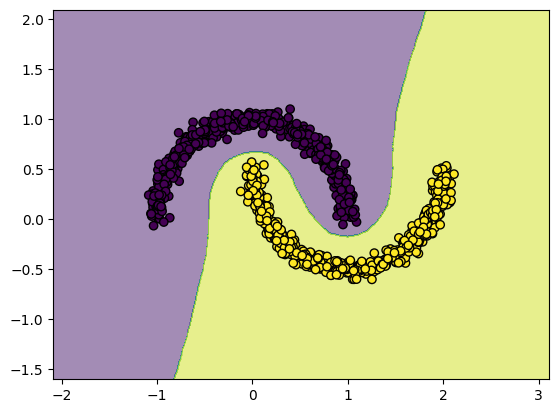

In [72]:
show_contour_plot(X,y,knn)

In [85]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [86]:
gm.weights_

array([0.49605671, 0.50394329])

In [87]:
gm.means_

array([[ 1.13897703, -0.13929291],
       [-0.13159223,  0.63396658]])

In [88]:
gm.covariances_

array([[[0.35322392, 0.05227752],
        [0.05227752, 0.09284858]],

       [[0.35246872, 0.04847814],
        [0.04847814, 0.09514422]]])

In [89]:
gm.converged_

True

In [90]:
gm.n_iter_

5

In [91]:
gm.predict(X)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [92]:
gm.predict_proba(X).round(2)

array([[0.94, 0.06],
       [0.  , 1.  ],
       [1.  , 0.  ],
       ...,
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [99]:
X_new, y_new = gm.sample(100)

In [100]:
X_new[:5]

array([[ 1.1732051 , -0.33902789],
       [ 0.63691969, -0.16574954],
       [ 0.74953775, -0.10107561],
       [ 1.9784773 ,  0.21018574],
       [ 1.12680331, -0.01741283]])

In [101]:
y_new[:5]

array([0, 0, 0, 0, 0])

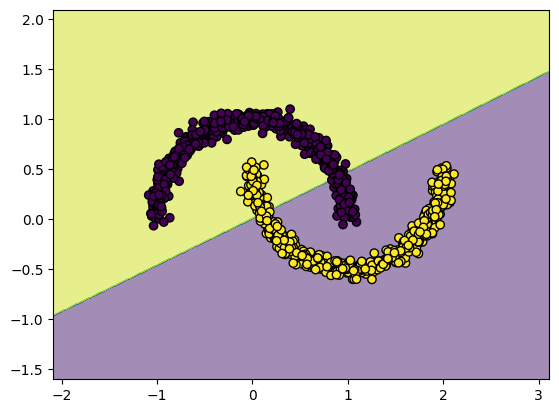

In [102]:
show_contour_plot(X,y,gm)

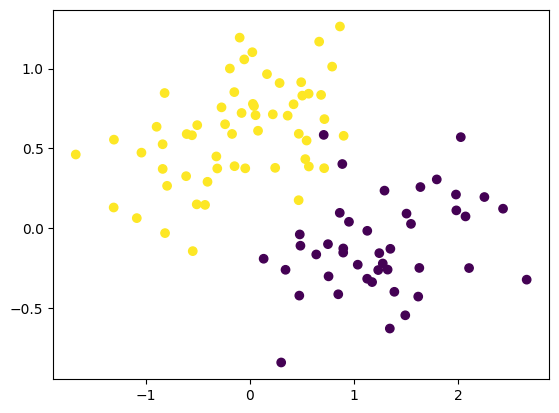

In [103]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_new)

In [104]:
gm.score_samples(X).round(2)

array([-1.62, -1.53, -2.42, -3.  , -1.4 , -1.78, -1.51, -1.33, -1.58,
       -1.83, -1.53, -1.38, -2.2 , -2.27, -0.99, -1.93, -1.76, -1.37,
       -1.62, -3.02, -1.37, -2.18, -1.26, -1.24, -1.77, -1.3 , -2.09,
       -1.48, -1.76, -1.24, -2.33, -1.66, -2.66, -1.57, -1.44, -2.08,
       -1.  , -1.49, -1.46, -1.49, -1.51, -1.62, -1.21, -1.83, -1.61,
       -1.19, -1.66, -1.38, -1.53, -1.46, -2.15, -2.32, -1.61, -1.7 ,
       -1.57, -1.42, -1.7 , -2.82, -1.19, -1.  , -2.27, -1.79, -1.28,
       -1.31, -1.65, -1.51, -3.29, -1.57, -1.58, -1.53, -1.5 , -1.95,
       -1.46, -1.84, -1.34, -1.15, -1.26, -1.98, -1.75, -1.17, -1.36,
       -2.22, -1.4 , -1.64, -1.58, -1.52, -1.99, -1.26, -1.58, -1.94,
       -1.33, -2.26, -1.91, -1.52, -1.06, -1.63, -1.32, -1.59, -1.45,
       -1.35, -1.37, -1.55, -2.15, -2.68, -1.3 , -2.31, -3.03, -1.76,
       -1.14, -1.38, -1.99, -1.52, -0.97, -2.24, -1.42, -2.27, -2.02,
       -1.57, -2.04, -1.55, -1.67, -2.32, -1.28, -1.93, -1.47, -2.17,
       -1.49, -1.56,

In [105]:
X,y = make_blobs(centers=5, n_samples=1000, random_state=44)

X[:5]

array([[-1.48338259, -2.1821318 ],
       [-2.75751986, -1.87670476],
       [-1.38275861, -2.66244686],
       [-2.09763597,  0.67187234],
       [-1.05470489, -1.03278115]])

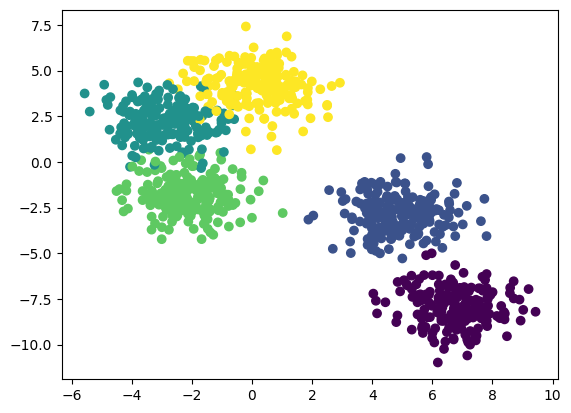

In [107]:
plt.scatter(X[:,0], X[:,1], c=y)

In [109]:
gm = GaussianMixture(n_components=5)

In [110]:
gm.fit(X)

GaussianMixture(n_components=5)

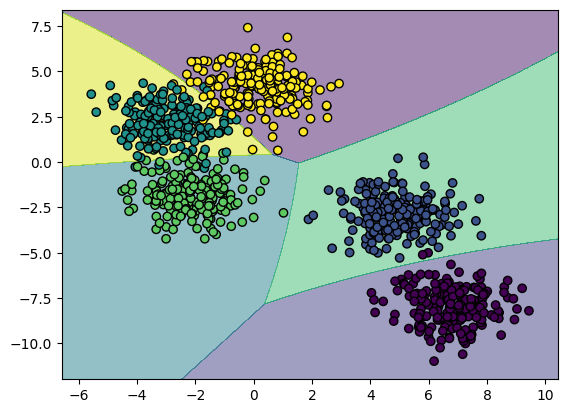

In [111]:
show_contour_plot(X,y,gm)

In [114]:
gm_sphere = GaussianMixture(n_components=5, covariance_type="spherical")
gm_sphere.fit(X)
gm_diag = GaussianMixture(n_components=5, covariance_type="diag")
gm_diag.fit(X)
gm_tied = GaussianMixture(n_components=5, covariance_type="tied")
gm_tied.fit(X)

GaussianMixture(covariance_type='tied', n_components=5)

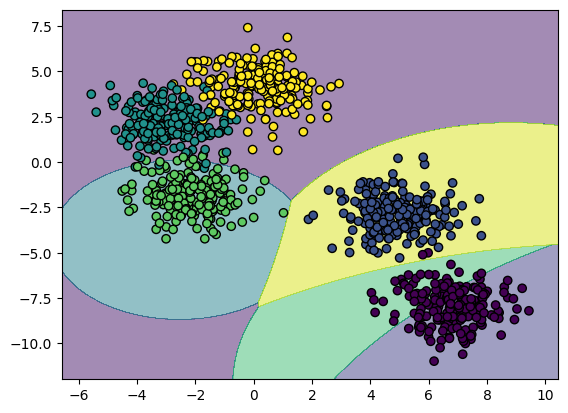

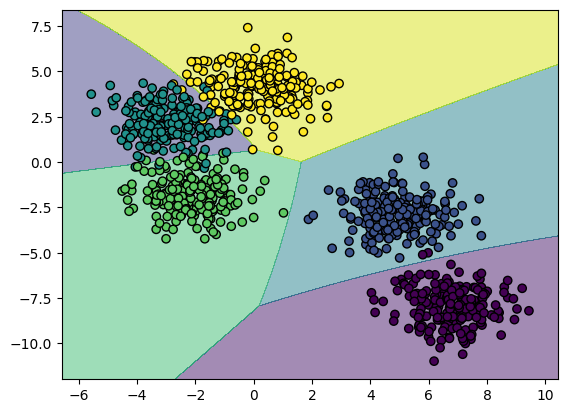

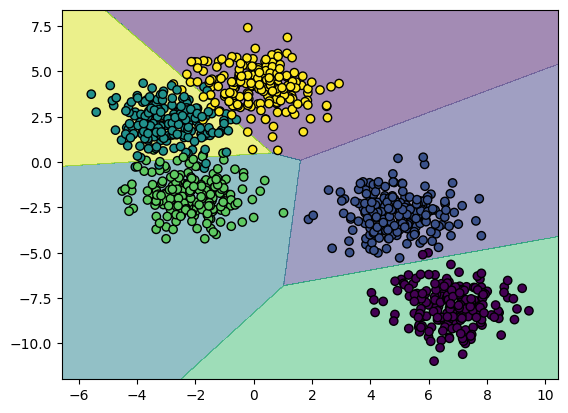

In [117]:
show_contour_plot(X,y,gm_sphere)
show_contour_plot(X,y,gm_diag)
show_contour_plot(X,y,gm_tied)

In [122]:
densities = gm.score_samples(X)
densities[:5]
density_treshold = np.percentile(densities, 2)
density_treshold

-7.144115307229527

In [123]:
anomalies = X[densities < density_treshold]

In [124]:
len(anomalies)

20

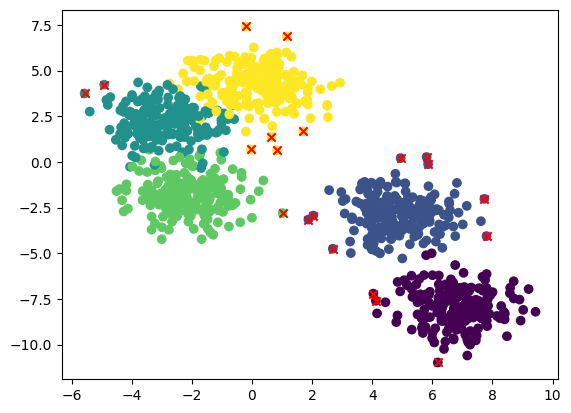

In [129]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(anomalies[:,0], anomalies[:,1], c = "r", marker="x")

In [132]:
gm.bic(X), gm.aic(X)

(8983.2582774713, 8840.933374380817)

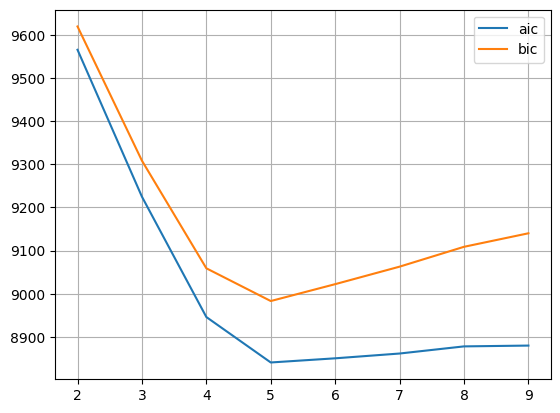

In [139]:
aic, bic = [], []

for k in range(2,10):
    gm = GaussianMixture(n_components=k, random_state=42)
    gm.fit(X)
    aic.append(gm.aic(X))
    bic.append(gm.bic(X))

plt.plot(range(2,10), aic, label="aic")
plt.plot(range(2,10), bic, label="bic")
plt.legend()
plt.grid()
plt.show()

In [141]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.2 , 0.  , 0.2 , 0.2 , 0.21, 0.2 , 0.  , 0.  , 0.  , 0.  ])